# Project 2 - INF264
*By Kim Austgulen and Fillip Lampe*

Short overview on this file, this will mainly focus on the results and the basis of what we will write in our report. As we want to keep this file more clean, we have most of the code move into our import files.

In [1]:
import numpy as np

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
dataset = np.load('../data/dataset.npz')
X, y = dataset['X'], dataset['y']

## Task 1: 

In [12]:
# this will take around 7-8 min depending on the machine
# our SVM model class
from svm import SVM

# it will split the data and preprocess it
n = 1 # number of intervals for the rand search
folds = 3 # number of folds for cross validation

# this will by deafult not use pca
svm = SVM(X, y, n, folds,seed=seed)
svm.fit()
svm_eval_info = svm.evaluate()


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END C=75.55750309950135, coef0=0.009839217559140079, degree=3, gamma=0.0010316674691784767, kernel=rbf, shrinking=True; total time=  19.1s
[CV] END C=75.55750309950135, coef0=0.009839217559140079, degree=3, gamma=0.0010316674691784767, kernel=rbf, shrinking=True; total time=  18.7s
[CV] END C=75.55750309950135, coef0=0.009839217559140079, degree=3, gamma=0.0010316674691784767, kernel=rbf, shrinking=True; total time=  16.1s
---------- training is finished. ----------

Random Search took 78.36 seconds
Best Parameters: {'shrinking': True, 'kernel': 'rbf', 'gamma': 0.0010316674691784767, 'degree': 3, 'coef0': 0.009839217559140079, 'C': 75.55750309950135}
Accuracy: 0.9105


In [8]:
# Our CNN models (PyTorch)
from pytorch_cnn import CNN_PT

#params must not be changed if you are gonna load the model
n = 5 # number of intervals for the rand search
folds = 3 # number of folds for cross validation
epochs = 10 # number of epochs for training
batch_size = 32 # batch size for training
path = '../other/' # path to save the models

# fit is removed as it is not reproducable
lenet_cnn_pt = CNN_PT(X, y, folds, seed, epochs, batch_size, path, model='lenet')
#lenet_cnn_pt.fit() # remove if you wanat to train the model
lenet_eval_info = lenet_cnn_pt.evaluate(load=True)

# fair warning this takes a while
# fit is removed as it is not reproducable
alexnet_cnn_pt = CNN_PT(X, y, folds, seed, epochs, batch_size, path, model='alexnet')
#alexnet_cnn_pt.fit() # remove if you wanat to train the model
alexnet_eval_info = alexnet_cnn_pt.evaluate(load=True)


Evaluating model on validation data...
Average loss: 0.0037, Accuracy: 0.9593
Evaluating model on validation data...
Average loss: 0.0033, Accuracy: 0.9559


In [7]:
from random_forest import RandomForest

folds = 3 # number of folds for cross validation
n = 5 # number of intervals for the
bagging_n = 2 

randomforest = RandomForest(X, y, n, folds, seed)
randomforest.fit()
randomforest_eval_info = randomforest.evaluate()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=103; total time=  11.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=103; total time=  11.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=103; total time=  12.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=  12.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=  13.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=261; total time=  13.0s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=162;

In [6]:
# Our CNN models (Keras)
# kim will cook up some code here

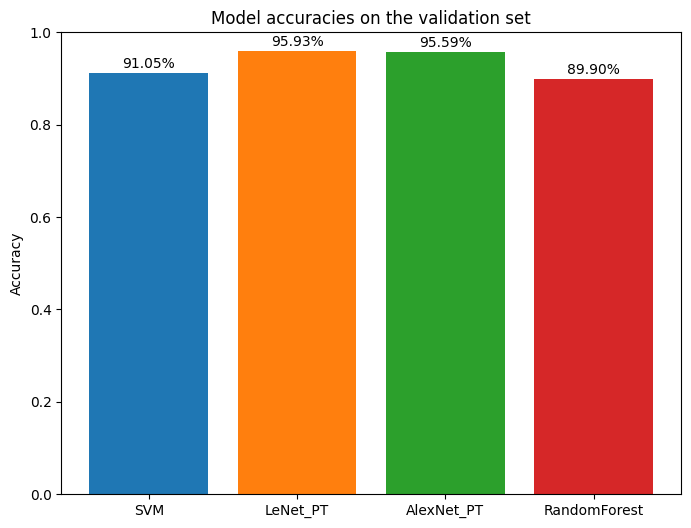

In [13]:
from visiualising import compare_model_accuracy

labels = ['SVM', 'LeNet_PT', 'AlexNet_PT', 'RandomForest']
compare_model_accuracy(
    labels, 
    svm_eval_info[1], 
    lenet_eval_info[1], 
    alexnet_eval_info[1],
    randomforest_eval_info[1]
    )

In [10]:
# Extract the accuracy values
accuracies = {
    'SVM': svm_eval_info[1],
    'LeNet_PT': lenet_eval_info[1],
    'AlexNet_PT': alexnet_eval_info[1]
}

# Find the model with the best accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f"The model with the best accuracy is {best_model} with an accuracy of {best_accuracy:.2f}")

The model with the best accuracy is LeNet_PT with an accuracy of 0.96


Small differences in hardware, like using different CPUs, can result in slightly different floating-point arithmetic, affecting model performance across runs. Due to these reproducability issues it is better to choose svm 

## Task 2:

In [8]:
# Our SVM model with PCA
n = 3 # number of intervals for the rand search
folds = 3 # number of folds for cross validation
pca_n = 3 # number of pca components it will test

svm_pca = SVM(X, y, n, folds, pca_n, seed=seed, pca=True)
svm_pca.fit()
svm_pca_eval_info = svm_pca.evaluate()

Starting PCA training...

--Training with 0.90 components 1/3--
Data went from (11747, 576) to (11747, 158)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END C=73.8459779302997, coef0=0.7790496653525528, degree=2, gamma=0.01135265110257893, kernel=poly, shrinking=True; total time=   5.4s
[CV] END C=73.8459779302997, coef0=0.7790496653525528, degree=2, gamma=0.01135265110257893, kernel=poly, shrinking=True; total time=   5.3s
[CV] END C=73.8459779302997, coef0=0.7790496653525528, degree=2, gamma=0.01135265110257893, kernel=poly, shrinking=True; total time=   5.0s
[CV] END C=74.12697052371779, coef0=0.948989844346279, degree=4, gamma=0.05713791454146769, kernel=rbf, shrinking=False; total time=  15.4s
[CV] END C=74.12697052371779, coef0=0.948989844346279, degree=4, gamma=0.05713791454146769, kernel=rbf, shrinking=False; total time=  16.1s
[CV] END C=74.12697052371779, coef0=0.948989844346279, degree=4, gamma=0.05713791454146769, kernel=rbf, shrinking=False; total time= 